#Ejercicio 1
## Objetivo:
El propósito de este ejercicio es llevar a cabo un análisis exploratorio de un conjunto de datos que
contiene información demográfica y económica de las provincias de Argentina
(provincias_datos_2022.xlsx). Este análisis tiene como objetivo realizar una exploración de las
variables e identificar características relevantes o asociaciones que permitan obtener conocimientos
relevantes para la toma de decisiones informadas en diversos ámbitos, como el económico, social y
político.
## Instrucciones:
1. Realizar las tareas de limpieza, transformación y normalización de los datos contenidos en el
archivo "provincias_datos_2022.csv" a fin de asegurar la calidad y homogeneidad de la
información.

In [ ]:
# Declaracion de consantes y variables
PROVINCIAS_DATASET = 'data/provincias_datos_2022.csv'


In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from shared import trim_column_names;

# Importando dataset
df = pd.read_csv(PROVINCIAS_DATASET, delimiter=';')

# Limpiando nombres de columnas
df = df.rename(columns=lambda x: trim_column_names(x) )
df.columns


In [ ]:
# Verificando los tipos de datos
df.info()
df.head()

In [210]:
import numpy as np

# Normalizando los tipos de datos 

# Se multiplica por 1000 y se convierte a int para que quede como entero las dos primeras columnas
# Como los valores no tienen sentidos para provincias chicas como catamarca
# se asume que provincias con un valor actual en menos de 100000 habitantes no estaban en escalas de miles.
# Luego se procede a mover de escala de unidades para los valores del resto de las provincias < a 100 mil.

for col in df.columns[1:3]:
    
    if df[col].isna().sum() > 0:
        df[col].interpolate(inplace=True)

    if df[col].dtype != 'int64':
        df[col] = df[col] * 1000
        df[col] = df[col].astype('int64')
        df[col] = np.where(df[col] < 100000, df[col]*1000 , df[col])

df.rename(columns={
    'POBLACION_MILES' : 'POBLACION',
    'HOGARES_MILES': 'HOGARES',
    'PROVINCIA': 'PROVINCIAS'},
    inplace=True)

# Se convierte desde string a float64 el resto de los valores para el resto de las columnas
#
for col in df.columns[3:]:
    if df[col].dtype != 'float64':
        df[col] = df[col].str.replace('.','')
        df[col] = df[col].str.replace(',','.').astype('float64')    
    
    if df[col].isna().sum() > 0:
        df[col].interpolate(inplace=True)

df.head()


,PROVINCIAS,POBLACION,HOGARES,INGRESOS_LABORALES_MILES_PESOS,TASA_DE_DESEMPLEO,SUPERFICIE_KM2,EXPORTACIONES_MILL_USD
0,Ciudad Autónoma de Buenos Aires,3004000,1263000,211877384.0,4.7,205.9,311.163
1,Buenos Aires,17292000,5738000,623250917.0,8.7,305907.4,33024.657
2,Catamarca,336000,102000,8460986.0,7.3,101486.1,201.030
3,Chaco,3477000,1251000,122790341.0,6.5,99763.3,516.336
4,Chubut,967000,287000,24733558.0,5.3,224302.3,2575.372


In [209]:
avg_personas_x_hogar = [ { row[1]["PROVINCIAS"] :   row[1]["POBLACION"]/row[1]["HOGARES"]} for row in df.iterrows() ]
avg_exportaciones_x_habitante = [ { row[1]["PROVINCIAS"] :   (row[1]["EXPORTACIONES_MILL_USD"]*1000000)/row[1]["POBLACION"]} for row in df.iterrows() ]
avg_personas_x_km2 = [ { row[1]["PROVINCIAS"] :   row[1]["POBLACION"]/row[1]["SUPERFICIE_KM2"]} for row in df.iterrows() ]

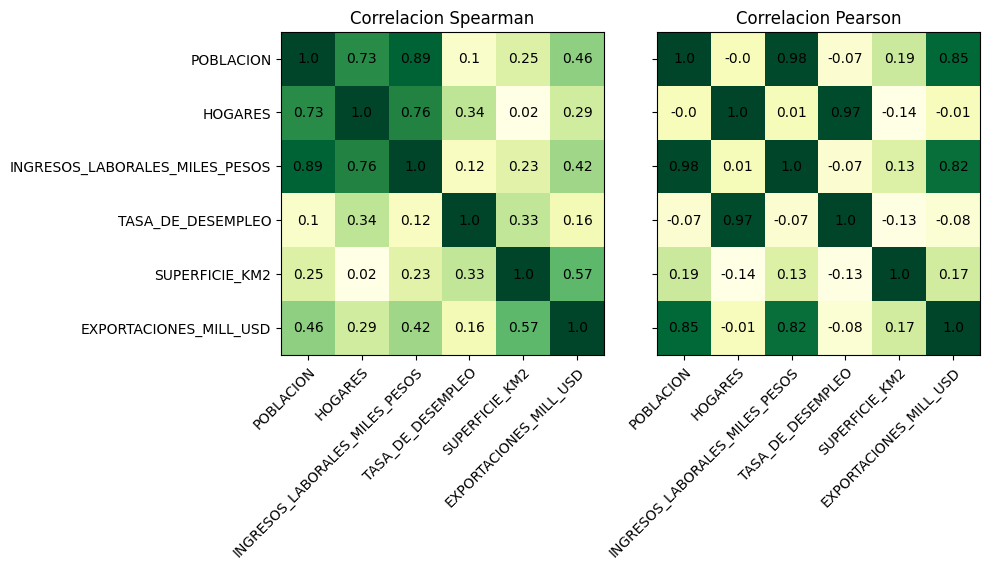

In [231]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

keys = ["POBLACION","HOGARES","INGRESOS_LABORALES_MILES_PESOS","TASA_DE_DESEMPLEO","SUPERFICIE_KM2","EXPORTACIONES_MILL_USD"]

corr_pearson = df[keys].corr(method = 'pearson').round(2).values
corr_spearman = df[keys].corr(method = 'spearman').round(2).values

fig, axs = plt.subplots(1,2,sharey=True,sharex=False,figsize=(10,10) )

ims = axs[0].imshow(corr_spearman, cmap="YlGn")
imp = axs[1].imshow(corr_pearson,cmap="YlGn")

# Mostrar los respectivos ticks con sus entradas correspondientes
[ax.set_xticks(np.arange(len(keys)), labels=keys) for ax in axs ]
[ax.set_yticks(np.arange(len(keys)), labels=keys) for ax in axs ]

# Rotacion y alineacion de los labels
[plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor") for ax in axs ]

# Loop sobre las dimensiones de los datos y se crean los textos para cada celda
for i in range(len(keys)):
    for j in range(len(keys)):
            axs[0].text(j, i, corr_spearman[i, j],
                    ha="center", va="center", color="black")
            axs[1].text(j, i, corr_pearson[i, j],
                    ha="center", va="center", color="black")
            
axs[0].set_title("Correlacion Spearman")
axs[1].set_title("Correlacion Pearson")

fig.tight_layout()
plt.show()

# Se 

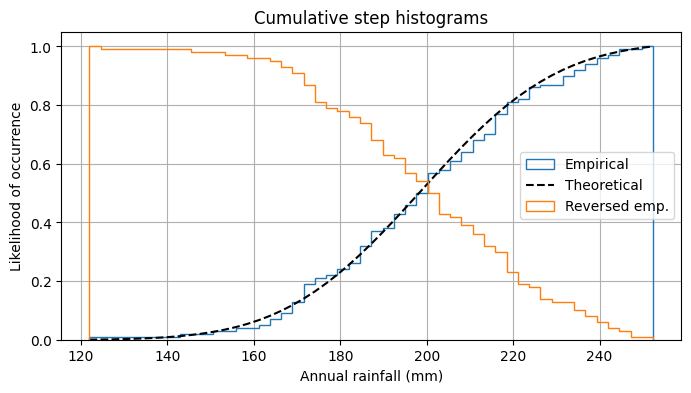

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
        label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()
